In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as numpy
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

Type of image: <class 'numpy.ndarray'>
Shape:  (146, 407, 3)


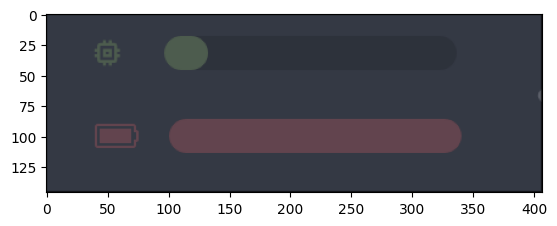

In [38]:
%matplotlib inline
image = cv2.imread('/tmp/screen.jpg')
print("Type of image:", type(image))
print("Shape: ", image.shape)
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image2)

In [39]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [40]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [41]:
get_image('/tmp/screen.jpg')
modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

In [42]:
clf = KMeans(n_clusters = 6)
labels = clf.fit_predict(modified_image)

([<matplotlib.patches.Wedge at 0x7e6af53a8aa0>,
 [Text(1.0981859309892577, 0.06314792931884118, '#443934'),
  Text(1.0012239178245361, 0.4555772891355393, '#474042'),
  Text(-1.0970994787249189, 0.07982940424124124, '#1c1715'),
  Text(0.714436577486447, -0.8364092160835223, '#4d4361'),
  Text(0.7741946163241481, -0.7814235062081927, '#4d5b4c'),
  Text(1.0262041188903819, -0.3961124920681186, '#3a312c')])

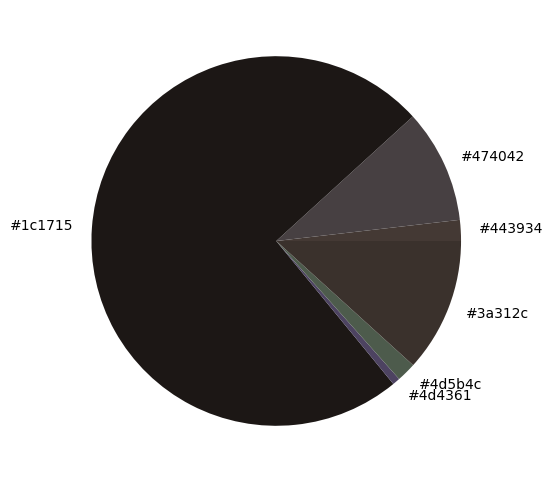

In [43]:
def get_colors( 
counts = Counter(labels)

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

plt.figure(figsize = (8, 6))
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
return rgb_colors